In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('customer_churn.csv')

In [3]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Data Manipulation

In [8]:
customer_5=df.iloc[:,4]
customer_5

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041     No
7042     No
Name: Dependents, Length: 7043, dtype: object

In [10]:
customer_15=df.iloc[:,14]
customer_15

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040     No
7041     No
7042    Yes
Name: StreamingMovies, Length: 7043, dtype: object

In [13]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [14]:
senior_male_electronic=df[(df['gender']=='Male')&(df['SeniorCitizen']==1)&(df['PaymentMethod']=='Electronic check')]
senior_male_electronic

customerID gender  SeniorCitizen Partner Dependents  tenure  \
20    8779-QRDMV   Male              1      No         No       1   
55    1658-BYGOY   Male              1      No         No      18   
57    5067-XJQFU   Male              1     Yes        Yes      66   
78    0191-ZHSKZ   Male              1      No         No      30   
91    2424-WVHPL   Male              1      No         No       1   
...          ...    ...            ...     ...        ...     ...   
6837  6229-LSCKB   Male              1      No         No       6   
6894  1400-MMYXY   Male              1     Yes         No       3   
6914  7142-HVGBG   Male              1     Yes         No      43   
6967  8739-WWKDU   Male              1      No         No      25   
7032  6894-LFHLY   Male              1      No         No       1   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
20             No  No phone service             DSL             No  ...   
55            Yes               Yes     Fiber optic             No  ...   
57            Yes               Yes     Fiber optic             No  ...   
78            Yes                No             DSL            Yes  ...   
91            Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
6837          Yes                No     Fiber optic             No  ...   
6894          Yes               Yes     Fiber optic             No  ...   
6914          Yes               Yes     Fiber optic             No  ...   
6967          Yes               Yes     Fiber optic             No  ...   
7032          Yes               Yes     Fiber optic             No  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
20                Yes          No          No             Yes  Month-to-month   
55                 No          No         Yes             Yes  Month-to-month   
57                Yes         Yes         Yes             Yes        One year   
78                 No          No         Yes             Yes  Month-to-month   
91                 No         Yes          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
6837               No          No         Yes              No  Month-to-month   
6894              Yes          No         Yes             Yes  Month-to-month   
6914              Yes          No         Yes             Yes  Month-to-month   
6967               No          No         Yes              No  Month-to-month   
7032               No          No          No              No  Month-to-month   

     PaperlessBilling     PaymentMethod MonthlyCharges  TotalCharges Churn  
20                Yes  Electronic check          39.65         39.65   Yes  
55                Yes  Electronic check          95.45       1752.55   Yes  
57                Yes  Electronic check         108.45       7076.35    No  
78                Yes  Electronic check          74.75        2111.3    No  
91                 No  Electronic check          74.70          74.7    No  
...               ...               ...            ...           ...   ...  
6837              Yes  Electronic check          79.70         497.6    No  
6894              Yes  Electronic check         105.90        334.65   Yes  
6914              Yes  Electronic check         103.00        4414.3   Yes  
6967              Yes  Electronic check          89.50       2196.15   Yes  
7032              Yes  Electronic check          75.75         75.75   Yes  

[298 rows x 21 columns]

In [15]:
customer_total_tenure=df[(df['tenure']>70)|(df['MonthlyCharges']>100)]
customer_total_tenure

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
8     7892-POOKP  Female              0     Yes         No      28   
12    8091-TTVAX    Male              0     Yes         No      58   
13    0280-XJGEX    Male              0      No         No      49   
14    5129-JLPIS    Male              0      No         No      25   
15    3655-SNQYZ  Female              0     Yes        Yes      69   
...          ...     ...            ...     ...        ...     ...   
7023  1035-IPQPU  Female              1     Yes         No      63   
7034  0639-TSIQW  Female              0      No         No      67   
7037  2569-WGERO  Female              0      No         No      72   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService MultipleLines InternetService       OnlineSecurity  ...  \
8             Yes           Yes     Fiber optic                   No  ...   
12            Yes           Yes     Fiber optic                   No  ...   
13            Yes           Yes     Fiber optic                   No  ...   
14            Yes            No     Fiber optic                  Yes  ...   
15            Yes           Yes     Fiber optic                  Yes  ...   
...           ...           ...             ...                  ...  ...   
7023          Yes           Yes     Fiber optic                   No  ...   
7034          Yes           Yes     Fiber optic                  Yes  ...   
7037          Yes            No              No  No internet service  ...   
7039          Yes           Yes     Fiber optic                   No  ...   
7042          Yes            No     Fiber optic                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
8                     Yes                  Yes                  Yes   
12                    Yes                   No                  Yes   
13                    Yes                   No                  Yes   
14                    Yes                  Yes                  Yes   
15                    Yes                  Yes                  Yes   
...                   ...                  ...                  ...   
7023                  Yes                   No                  Yes   
7034                  Yes                   No                  Yes   
7037  No internet service  No internet service  No internet service   
7039                  Yes                   No                  Yes   
7042                  Yes                  Yes                  Yes   

          StreamingMovies        Contract PaperlessBilling  \
8                     Yes  Month-to-month              Yes   
12                    Yes        One year               No   
13                    Yes  Month-to-month              Yes   
14                    Yes  Month-to-month              Yes   
15                    Yes        Two year               No   
...                   ...             ...              ...   
7023                  Yes  Month-to-month              Yes   
7034                   No  Month-to-month              Yes   
7037  No internet service        Two year              Yes   
7039                  Yes        One year              Yes   
7042                  Yes        Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges Churn  
8              Electronic check         104.80       3046.05   Yes  
12      Credit card (automatic)         100.35        5681.1    No  
13    Bank transfer (automatic)         103.70        5036.3   Yes  
14             Electronic check         105.50       2686.05    No  
15      Credit card (automatic)         113.25       7895.15    No  
...                         ...            ...           ...   ...  
7023           Electronic check         103.50        6479.4    No  
7034    Credit card (automatic)         102.95       6886.25   Yes  
7037  Bank transfer (

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [17]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [21]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [22]:
two_mail_yes=df[(df['Contract']=='Two year')&(df['PaymentMethod']=='Mailed check')&(df['Churn']=='Yes')]
two_mail_yes

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
268   6323-AYBRX    Male              0      No         No      59   
5947  7951-QKZPL  Female              0     Yes        Yes      33   
6680  9412-ARGBX  Female              0      No        Yes      48   

     PhoneService MultipleLines InternetService       OnlineSecurity  ...  \
268           Yes            No              No  No internet service  ...   
5947          Yes           Yes              No  No internet service  ...   
6680          Yes            No     Fiber optic                   No  ...   

         DeviceProtection          TechSupport          StreamingTV  \
268   No internet service  No internet service  No internet service   
5947  No internet service  No internet service  No internet service   
6680                  Yes                  Yes                  Yes   

          StreamingMovies  Contract PaperlessBilling PaymentMethod  \
268   No internet service  Two year               No  Mailed check   
5947  No internet service  Two year              Yes  Mailed check   
6680                   No  Two year              Yes  Mailed check   

     MonthlyCharges  TotalCharges Churn  
268           19.35        1099.6   Yes  
5947          24.50         740.3   Yes  
6680          95.50       4627.85   Yes  

[3 rows x 21 columns]

In [23]:
customer_333=df.sample(n=333)
customer_333

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
252   9514-JDSKI    Male              1     Yes         No       1   
2590  4526-ZJJTM  Female              1     Yes         No      25   
2848  7508-KBIMB    Male              0     Yes        Yes      24   
247   9947-OTFQU    Male              1      No         No      15   
2242  3378-AJRAO    Male              0     Yes        Yes      44   
...          ...     ...            ...     ...        ...     ...   
1346  2845-HSJCY  Female              0     Yes        Yes      14   
2688  1569-TTNYJ    Male              0     Yes         No       5   
4454  8410-BGQXN    Male              0      No         No       4   
2297  3870-MQAMG  Female              0     Yes         No      54   
6076  2580-ATZSQ  Female              0     Yes        Yes      65   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
252            No  No phone service             DSL                   No  ...   
2590          Yes                No     Fiber optic                   No  ...   
2848          Yes                No             DSL                  Yes  ...   
247           Yes                No     Fiber optic                   No  ...   
2242          Yes               Yes              No  No internet service  ...   
...           ...               ...             ...                  ...  ...   
1346          Yes               Yes     Fiber optic                   No  ...   
2688          Yes               Yes     Fiber optic                   No  ...   
4454          Yes                No              No  No internet service  ...   
2297          Yes               Yes     Fiber optic                   No  ...   
6076          Yes                No             DSL                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
252                    No                   No                  Yes   
2590                  Yes                   No                   No   
2848                  Yes                   No                   No   
247                    No                   No                   No   
2242  No internet service  No internet service  No internet service   
...                   ...                  ...                  ...   
1346                  Yes                   No                   No   
2688                   No                   No                   No   
4454  No internet service  No internet service  No internet service   
2297                  Yes                  Yes                  Yes   
6076                  Yes                   No                   No   

          StreamingMovies        Contract PaperlessBilling  \
252                    No  Month-to-month               No   
2590                  Yes  Month-to-month               No   
2848                   No        One year              Yes   
247                    No  Month-to-month              Yes   
2242  No internet service        One year               No   
...                   ...             ...              ...   
1346                  Yes  Month-to-month              Yes   
2688                   No  Month-to-month              Yes   
4454  No internet service  Month-to-month               No   
2297                  Yes        One year               No   
6076                   No        One year               No   

                  PaymentMethod MonthlyCharges  TotalCharges Churn  
252            Electronic check          40.20          40.2   Yes  
2590  Bank transfer (automatic)          88.40       2191.15    No  
2848    Credit card (automatic)          56.25       1454.25    No  
247            Electronic check          74.40        1074.3   Yes  
2242           Electronic check          24.85        1013.6    No  
...                         ...            ...           ...   ...  
1346           Electronic check          87.25        1258.6   Yes  
2688           Electronic check          7

In [24]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

# Data Visualization

In [25]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Text(0.5, 1.0, 'Distribution of Internet Service')

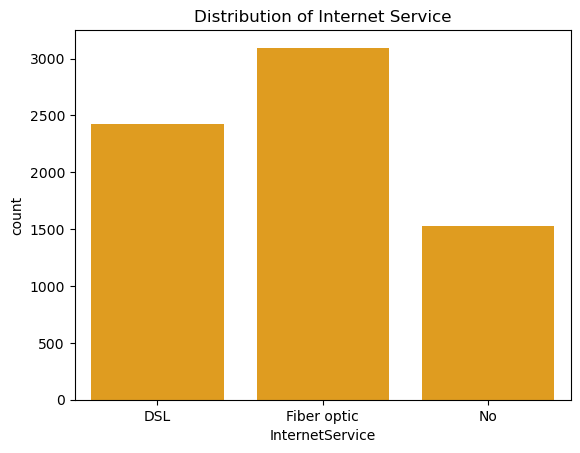

In [29]:
sns.countplot(x='InternetService',data=df,color='orange')
plt.title('Distribution of Internet Service')

Text(0.5, 1.0, 'Distribution of tenure')

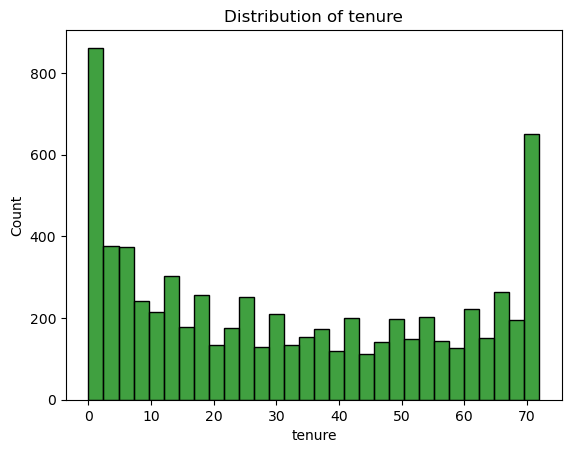

In [33]:
sns.histplot(x='tenure',data=df,bins=30,color='green')
plt.title('Distribution of tenure')

Text(0.5, 1.0, 'Tenure vs Monthly Charges')

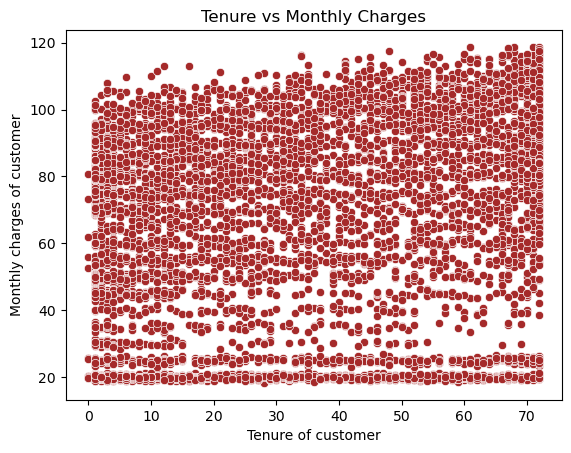

In [35]:
sns.scatterplot(x='tenure',y='MonthlyCharges',data=df,color='brown')
plt.xlabel('Tenure of customer')
plt.ylabel('Monthly charges of customer')
plt.title('Tenure vs Monthly Charges')

<Axes: xlabel='Contract', ylabel='tenure'>

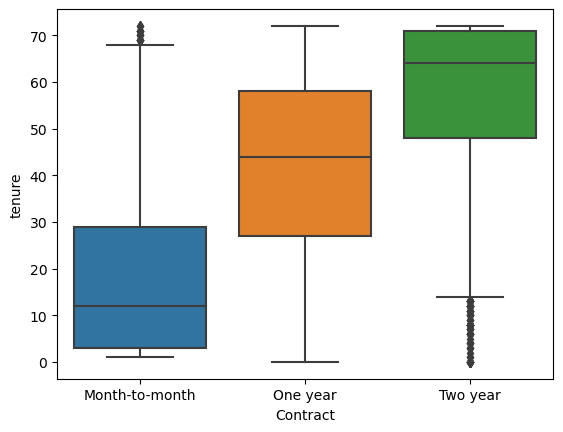

In [36]:
sns.boxplot(x='Contract',y='tenure',data=df)

# Linear Regression

In [42]:
X=df['tenure'].values.reshape(-1,1)
y=df['MonthlyCharges']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [44]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [45]:
y_pred=lr.predict(X_test)

In [48]:
error=np.sum(y_pred-y_test)
error

284.83336650335843

In [53]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
rmse

29.301673455217735

# Logistic Regression

In [54]:
X=df['MonthlyCharges'].values.reshape(-1,1)
y=df['Churn']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=101)

In [57]:
logr=LogisticRegression()
logr.fit(X_train,y_train)

LogisticRegression()

In [58]:
y_pred=logr.predict(X_test)

In [64]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[1806,    0],
       [ 660,    0]], dtype=int64)

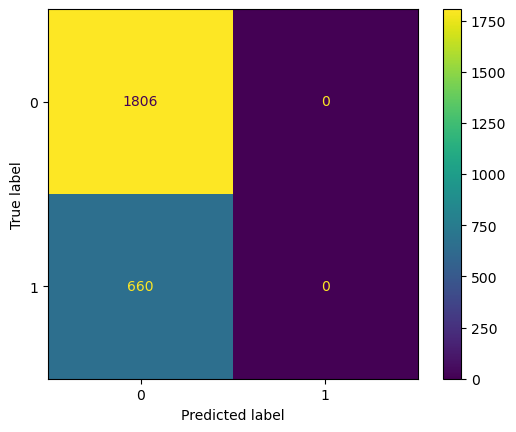

In [65]:
ConfusionMatrixDisplay(cm).plot()

In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.73      1.00      0.85      1806
         Yes       0.00      0.00      0.00       660

    accuracy                           0.73      2466
   macro avg       0.37      0.50      0.42      2466
weighted avg       0.54      0.73      0.62      2466



C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [67]:
accuracy_score(y_test,y_pred)

0.732360097323601

# Multiple Logistic Regression

In [136]:
X=df[['tenure','MonthlyCharges']]
y=df['Churn']

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [138]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [139]:
logr=LogisticRegression()
logr.fit(X_train,y_train)

LogisticRegression()

In [140]:
y_pred=logr.predict(X_test)

In [141]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[940,  86],
       [228, 155]], dtype=int64)

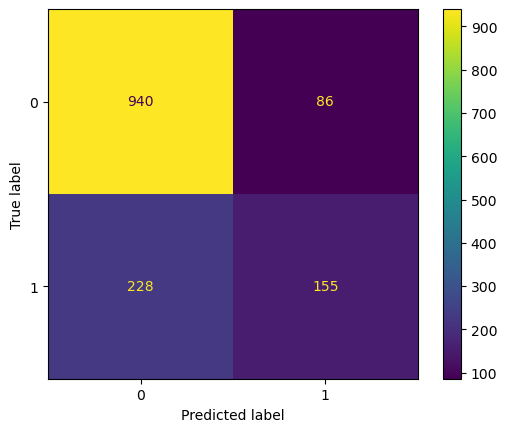

In [142]:
ConfusionMatrixDisplay(cm).plot()

In [143]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.80      0.92      0.86      1026
         Yes       0.64      0.40      0.50       383

    accuracy                           0.78      1409
   macro avg       0.72      0.66      0.68      1409
weighted avg       0.76      0.78      0.76      1409



In [144]:
accuracy_score(y_test,y_pred)

0.7771469127040455

# Decision Tree

In [77]:
X=df['tenure'].values.reshape(-1,1)
y=df['Churn']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [79]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [80]:
y_pred=dtc.predict(X_test)

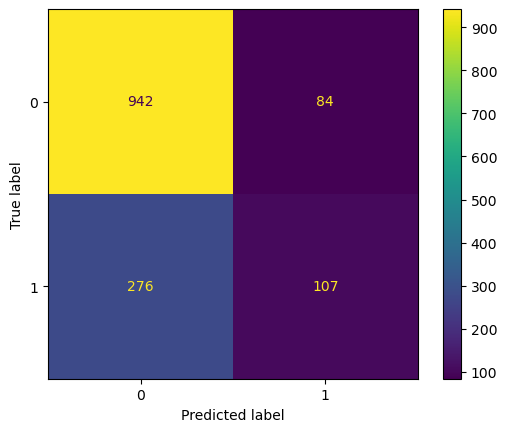

In [81]:
cm=confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cm).plot()

In [82]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.77      0.92      0.84      1026
         Yes       0.56      0.28      0.37       383

    accuracy                           0.74      1409
   macro avg       0.67      0.60      0.61      1409
weighted avg       0.72      0.74      0.71      1409



In [83]:
accuracy_score(y_test,y_pred)

0.7444996451383961

# Random Forest

In [127]:
X=df[['tenure','MonthlyCharges']]
y=df['Churn']

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [129]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [131]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [132]:
y_pred=rfc.predict(X_test)

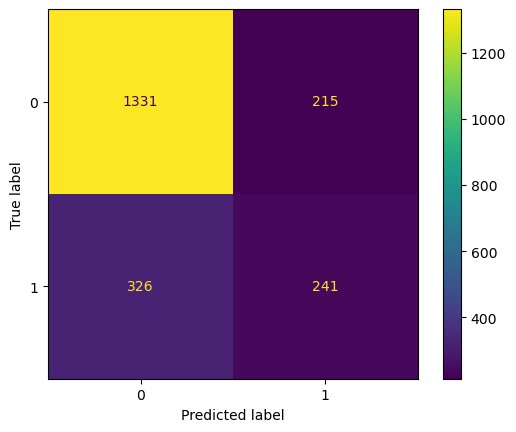

In [133]:
cm=confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cm).plot()

In [134]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.80      0.86      0.83      1546
         Yes       0.53      0.43      0.47       567

    accuracy                           0.74      2113
   macro avg       0.67      0.64      0.65      2113
weighted avg       0.73      0.74      0.73      2113



In [135]:
accuracy_score(y_test,y_pred)

0.7439659252247989